## Deep Learning and Inverse Problems, Problem Set 3

03764090, Tu-Chin Chiang 


### Problem 1 Sparse Signal Recovery

Start by importing some libraries needed along the way.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Construct the dataset and necessary matrices.

In [2]:
A = np.random.normal(loc=0.0, scale=1.0, size=(2000, 1000))
e = np.random.normal(loc=0.0, scale=np.sqrt(0.1), size=2000)

x = np.random.normal(loc=0.0, scale=1.0, size=100)
x = np.concatenate((x, np.zeros(900)))
np.random.shuffle(x)

y = np.dot(A, x) + e

#### (a) Iterated Soft Thresholding Algorithm (ISTA)
>plot the value of $g(x^k) − g(x^∗)$ over the number of iterations, $k$. Here, $x^∗$is obtained by running the algorithm until convergence.

1. Define function $g({\bf x}) = \frac{1}{2}||{\bf Ax-y}||_2^2 + λ||{\bf x}||_1$, $f({\bf x}) = \frac{1}{2}||{\bf Ax-y}||_2^2$ , the gradient $\nabla f(\bf{x})$ and ISTA.

In [3]:
def square_error_ridge(A, x, y, lamb=0.05):
    return (np.linalg.norm(np.dot(A, x) - y) ** 2) / 2.0 + lamb * (np.linalg.norm(x, ord=1))

def gradient_square_error(A, x, y):
    return np.dot(A.T, np.dot(A, x) - y)

def ISTA(x, gradient, eta=1.0, lamb=0.05):
    # gradient descent
    x_new = x - eta * gradient
    
    # soft thresholding
    small = x_new < (-lamb)
    middle = np.absolute(x_new) <= lamb
    large = x_new > lamb

    x_new[small] += lamb
    x_new[middle] = 0
    x_new[large] -= lamb

    return x_new

2. Conduct fitting procedure.

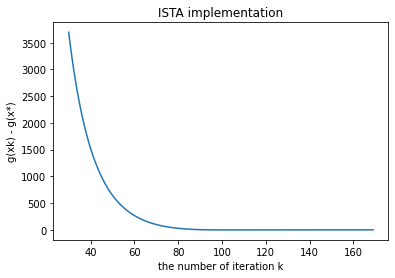

In [4]:
x_list = []
x_curr = np.ones(1000)
lamb = 0.001
eta = 0.0001

while True:
    x_list.append(x_curr)

    # Perform the iterates
    grad_f = gradient_square_error(A, x_curr, y)
    x_new = ISTA(x_curr, grad_f, eta, lamb)

    # Judge whether the convergence holds
    if np.all(np.abs(x_new - x_curr) < 0.00001):
        break
    else:
        x_curr = x_new

ks = range(len(x_list))
g_xk = [square_error_ridge(A, x_list[k], y, lamb) for k in ks]
g_xmin = g_xk[-1]

plt.plot(ks[30:], g_xk[30:] - g_xmin)
plt.title('ISTA implementation')
plt.xlabel('the number of iteration k')
plt.ylabel('g(xk) - g(x*)')
plt.show()

3. Note that each elements of prediction ${\bf x}^*$ is close to the original ${\bf x}$ signal. 

In [5]:
print(np.all(np.absolute(x_list[-1] - x) < 0.03))

True


#### (b) Determine the value $k$ of $k$-sparse vectors ${\bf x}^*$.

1. Define some useful functions for part (b).

In [6]:
def k_sparse_vector(k):
    x = np.random.normal(loc=0.0, scale=1.0, size=k)
    x = np.concatenate((x, np.zeros(2000 - k)))
    np.random.shuffle(x)
    return x

def fitting(x0, A, y, eta, lamb):
    x_curr = x0

    for _ in range(300):
        # Perform the iterates
        grad_f = gradient_square_error(A, x_curr, y)
        x_new = ISTA(x_curr, grad_f, eta, lamb)
    
        # Judge whether the convergence holds
        if np.all(np.abs(x_new - x_curr) < 0.001):
            break
        else:
            x_curr = x_new
    return x_new

2. Iterate the sparse value k with differnt λ. Use the grid search to find the smallest $g({\bf x}^k) − g({\bf x}^∗)$.

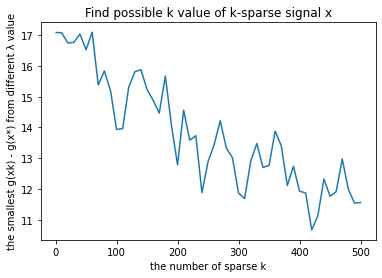

Under the same iteration condition,
when k = 420, the ls-regression has minimum value 10.666483 with λ = 0.001000


In [11]:
A = np.random.normal(loc=0.0, scale=1.0, size=(500, 2000))
lambdas = np.logspace(-3.0, 7.0, num=10)
ks_sparse = [1] + [k for k in range(10, 501, 10)]
x0 = np.ones(2000)
eta = 0.0001

sparse_list = []
for k in ks_sparse:
    x = k_sparse_vector(k)
    y = np.dot(A, x)

    gs_lambda = []
    for la in lambdas:
        x_theta = fitting(x0, A, y, eta, la)
        g = square_error_ridge(A, x_theta, y, la)
        gmin = square_error_ridge(A, x, y, la)
        gs_lambda.append(np.absolute(g - gmin))
    
    min = np.argmin(gs_lambda)
    sparse_list.append([lambdas[min], gs_lambda[min]])

sparse_list = np.asarray(sparse_list)
min_k = np.argmin(sparse_list[:, 1])
plt.plot(ks_sparse, sparse_list[:, 1])
plt.title('Find possible k value of k-sparse signal x')
plt.xlabel('the number of sparse k')
plt.ylabel('the smallest g(xk) - g(x*) from different λ value')
plt.show()

print('Under the same iteration condition,\n\
when k = %d, the ls-regression has minimum value %f with λ = %f'
% (ks_sparse[min_k], sparse_list[min_k, 1], sparse_list[min_k, 0]))

3. In general, when the k becomes larger, the differnce of the $g({\bf x})$ becomes smaller.